# Processing TESS sector 5 data for TOI4504

In [1]:
%matplotlib inline
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

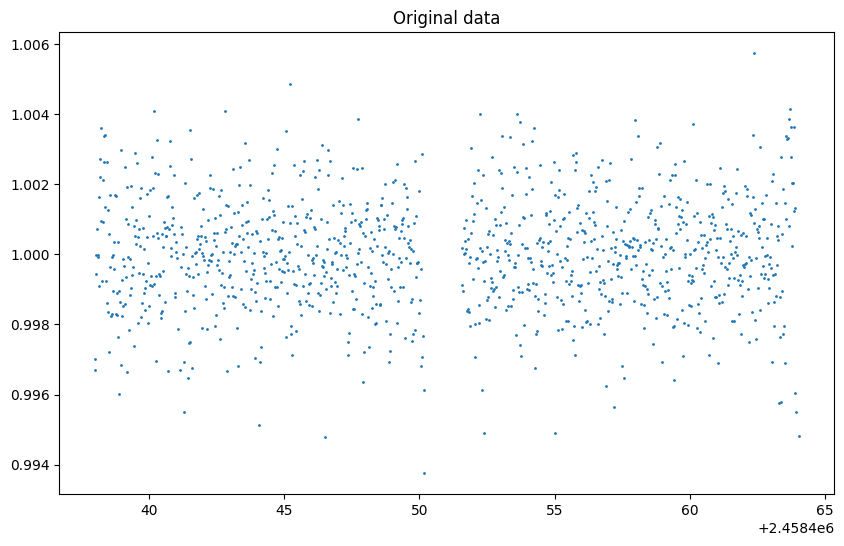

,time,flux,flux_err
0,2.458438e+06,0.996695,NaN
1,2.458438e+06,0.997028,NaN
2,2.458438e+06,0.999991,NaN
3,2.458438e+06,0.999443,NaN
4,2.458438e+06,1.000730,NaN
...,...,...,...
1162,2.458464e+06,1.001227,NaN
1163,2.458464e+06,0.996057,NaN
1164,2.458464e+06,1.001327,NaN
1165,2.458464e+06,0.995511,NaN


In [2]:
full_path = path+"5/5_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

In [3]:
df = calculate_flux_err(df, window_length=101)
df

,time,flux,flux_err
0,2.458438e+06,0.996695,0.001895
1,2.458438e+06,0.997028,0.001887
2,2.458438e+06,0.999991,0.001869
3,2.458438e+06,0.999443,0.001884
4,2.458438e+06,1.000730,0.001876
...,...,...,...
1162,2.458464e+06,1.001227,0.002315
1163,2.458464e+06,0.996057,0.002335
1164,2.458464e+06,1.001327,0.002357
1165,2.458464e+06,0.995511,0.002370


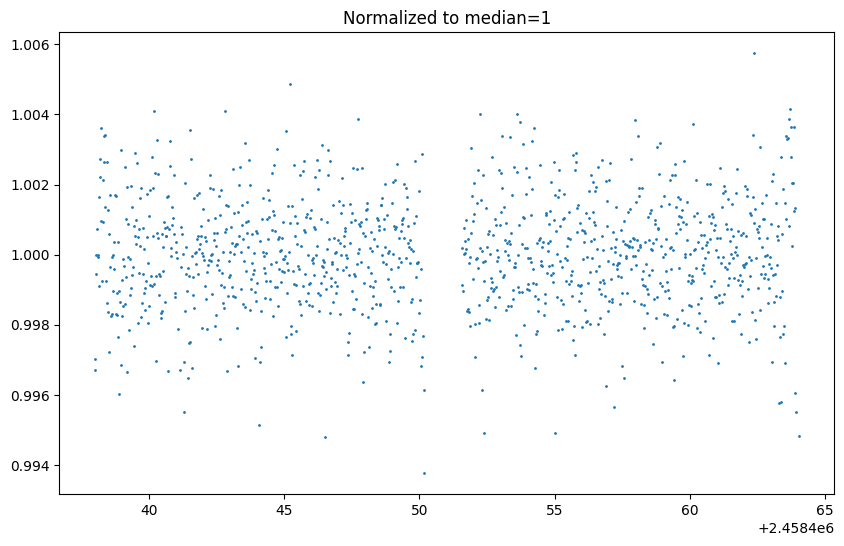

,time,flux,flux_err
0,2.458438e+06,0.996702,0.001895
1,2.458438e+06,0.997035,0.001887
2,2.458438e+06,0.999998,0.001869
3,2.458438e+06,0.999450,0.001884
4,2.458438e+06,1.000737,0.001876
...,...,...,...
1162,2.458464e+06,1.001234,0.002315
1163,2.458464e+06,0.996064,0.002335
1164,2.458464e+06,1.001334,0.002357
1165,2.458464e+06,0.995518,0.002370


In [4]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [5]:
df2csv(df, full_path[:-4]+"_p.csv")